##Set up

In [1]:
#Cloning the APS360Project repo
!git clone https://github.com/Marneus981/Aps360Project.git

Cloning into 'Aps360Project'...
remote: Enumerating objects: 14308, done.
remote: Counting objects: 100% (14308/14308), done.
remote: Compressing objects: 100% (11287/11287), done.
remote: Total 14308 (delta 2246), reused 14305 (delta 2243), pack-reused 0
Receiving objects: 100% (14308/14308), 6.46 MiB | 9.04 MiB/s, done.
Resolving deltas: 100% (2246/2246), done.


In [2]:
%cd /content/Aps360Project
!git pull

/content/Aps360Project
Already up to date.


In [3]:
#Cloning the APS360Project repo
#!git clone https://github.com/mirza2000/ProjectDataset.git

In [4]:
#%cd /content/ProjectDataset
#!git pull

In [5]:
#Setup


#Imports taken from tutorial example
import torch
import os
import random
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt # plotting
import torch.optim as optim #gradient descent
import torchvision #to make things easier
from torchvision import models, datasets, transforms #migght be redundant
from torch.utils.data.sampler import SubsetRandomSampler# to use the data loader
from torch.utils.data import TensorDataset #load the tensordataset
from torch.utils.data import TensorDataset, DataLoader

#Ill be using hardware acceleration by means of a GPU 
use_cuda = True




In [6]:
#For reproducibility

seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set `pytorch` pseudo-random generator at a fixed value
torch.manual_seed(seed_value)
torch.cuda.manual_seed(seed_value)

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

##Data Loading



```
train_dir = '/content/drive/MyDrive/APS360 Project/Project_Data_Sorted'
dest_dir = '/content/all_images'
counter = 0
counter2 = 0

for subdir, dirs, files in os.walk(train_dir):
    #print(files)
    if counter2 > 2048:
      break
    counter2+=1
    for file in files:
      filename = str(file)
      if (filename.endswith('.png')):
        full_path = os.path.join(subdir, file)
        #print(full_path)
        shutil.copy(full_path, dest_dir)
        counter = counter + 1
print(counter)
```





```
subdirs, dirs, files = os.walk('/content/all_images').__next__()
m = len(files)
print(m)

filenames = []
labels = np.zeros((m, 1))

images_dir = '/content/all_images'
filenames_counter = 0
labels_counter = -1

for subdir, dirs, files in os.walk(images_dir):
    #print(files)
    for file in files:
        filenames.append(file)
        labels[filenames_counter, 0] = labels_counter
        filenames_counter = filenames_counter + 1
        print(str(file))
    labels_counter = labels_counter+1
    
print(len(filenames))
print(labels.shape)
print(labels)
```



0
['D4', 'G4', 'A4', 'B4', 'B4', 'C5', 'D5', 'E5', 'D5', 'C5', 'B4', 'C5', 'B4', 'B4', 'D4']


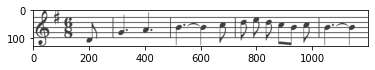

In [8]:
#Data loading

data_path = "/content/Aps360Project/Project_Data_Big"
#extract images and labels from dataset folder and put into arrays
images = []
label = []
counter = 0
err_count = 0
for root, dirs, files in os.walk(data_path):
  if counter > 2048:
    break
  counter+=1
  for file in files:
    try:
      filename = str(file)
      if (filename.endswith('.png') and not filename.startswith('._')):
        #print(str(root))
        filepath = str(root) + '/' + str(file)
        img = plt.imread(filepath)
        img_cropped = img[0:154, 0:1200]
        images.append(img_cropped)
      if (filename.endswith('.semantic') and not filename.startswith('._')):
        filepath = str(root) + '/' + str(file)
        f = open(filepath, 'r')
        contents = f.read()
        elements = contents.split("\t", 50)
        #print(elements)
        semantic = []
        for element in elements:
          #print(element)
          if element.startswith('note'):
            element = element[5:8]
            if element.endswith('_'):
              element = element[:-1]
            semantic.append(element)

        label.append(semantic)
    except:
        print("error")
        err_count += 1
        print(len(images))


#example image and label
print(err_count)
plt.imshow(images[3]) 
print(label[3])

#convert labels to integer encoding

#helper functions

letters_to_numbers =  {
  'C':0,
  'D':2,
  'E':4,
  'F':5,
  'G':7,
  'A':9,
  'B':11
  }
accidentals_to_numbers = {
    'x':2,
    '#':1,
    '':0,
    'n':0,
    'b':-1,
    'bb':-2
}
def letter_to_int(noteId, noteDict):
  #Get octave
  octaveNum = int(noteId[-1])
  #Get letter name
  letterName = noteId[0]
  letterNum = letters_to_numbers[letterName]
  #Get accidental  
  accidentalName = noteId[1:-1]
  accidentalNum = accidentals_to_numbers[accidentalName]
  #Add together
  noteNum = (octaveNum+1)*12+letterNum+accidentalNum
  noteDict[noteNum] = noteId
  return noteNum

#call functions on label set to generate integer labels
int_label = []
noteDict = {}
for semantic in label:
  int_semantic = []
  for note in semantic:
    int_semantic.append(letter_to_int(note, noteDict))
  int_label.append(int_semantic)  



In [9]:
#Create list of tensors (to be converted to a tensor)
image_tensors_list = [torch.from_numpy(item).float() for item in images]

In [10]:
#torch.save(label, '/content/label_list.pt')

In [11]:
label = []

In [12]:
#label = torch.load('/content/label_list.pt')
#print(label)

In [13]:
#torch.save(image_tensors_list, '/content/image_tensors_list.pt')

In [14]:
images = []
#image_tensors_list = []

In [15]:
#image_tensors_list = torch.load('/content/image_tensors_list.pt')

In [16]:
#Code to figure out padding for data (images)
# for i in range(10):
#   print(image_tensors_list[i].shape)
# print(image_tensors_list[0].shape[0])
# print(image_tensors_list[0].shape[1])
# print(image_tensors_list[0].shape[2])

max_along0 = 0
max_along1 = 0
for i in range(len(image_tensors_list)):
  if ( image_tensors_list[i].shape[0] > max_along0 ):
    max_along0 = image_tensors_list[i].shape[0]
  if ( image_tensors_list[i].shape[1] > max_along1 ):
    max_along1 = image_tensors_list[i].shape[1]
print(max_along0)
print(max_along1)

154
1200


In [17]:
#Find max lenght of labels for padding
def FindMaxLength(lst): 
    maxList = max((x) for x in lst) 
    maxLength = max(len(x) for x in lst ) 
  
    return maxList, maxLength 
maxList, maxLength  = FindMaxLength(int_label)

print(maxLength)


47


In [18]:
#padding list of labels with blank notes (0s)

for i in range(len(int_label)):
  int_label[i] += [0] * (maxLength - len( int_label[i]))

#padding list of tensors (data) with a bunch or zeros
target = torch.zeros(30, 35, 512)
source = torch.ones(30, 35, 49)

for i in range(len(image_tensors_list)):
  target = torch.zeros(max_along0, max_along1, 3)
  target[:image_tensors_list[i].shape[0], :image_tensors_list[i].shape[1], :] = image_tensors_list[i]
  image_tensors_list[i] = target
#convert image into a tensor
#create tensor of data


image_tensors_list_tensor = torch.stack(image_tensors_list)
print(image_tensors_list_tensor.shape)

torch.Size([2048, 154, 1200, 3])


In [19]:
#image_tensors_list = []

In [20]:
#torch.save(image_tensors_list_tensor, '/content/image_tensors_tensor.pt')

In [21]:
print(image_tensors_list_tensor.permute(0,3,1,2).size())

torch.Size([2048, 3, 154, 1200])


In [22]:
image_tensors_list_tensor = image_tensors_list_tensor.permute(0,3,1,2)

In [23]:
#split labels
training_labels = int_label[:1638]
validation_labels = int_label[1638:1843]
testing_labels = int_label[1843:]

#transform tensors to labels

training_labels_tensor = torch.FloatTensor(training_labels)
validation_labels_tensor = torch.FloatTensor(validation_labels)
testing_labels_tensor = torch.FloatTensor(testing_labels)

#split data (180 samples not 320)
# training_data = images[:108]
# validation_data = images[108:144]
# testing_data = images[144:]

#split tensor data
training_tensor= image_tensors_list_tensor[:1638]
validation_tensor = image_tensors_list_tensor[1638:1843]
testing_tensor = image_tensors_list_tensor[1843:]

In [24]:
print(training_labels_tensor.shape)

torch.Size([1638, 47])


In [25]:
print(image_tensors_list[0].shape)
print(len(image_tensors_list))

torch.Size([154, 1200, 3])
2048


In [26]:
print(len(int_label))
print(len(training_labels))
print(len(validation_labels))
print(len(testing_labels))

2048
1638
205
205


In [27]:
max(map(max, int_label))

90

In [28]:
image_tensors_list = []
#image_tensors_list_tensor = torch.Tensor(0)

In [29]:
print(image_tensors_list)
#print(image_tensors_list_tensor)

[]


Need to drop last because inconsistent batch sizes don't work on our CRNN

In [30]:
batch_size = 64
#"Final" datasets and dataloaders
training_dataset = TensorDataset(training_tensor,training_labels_tensor) # training dataset
training_loader = DataLoader(training_dataset,batch_size=batch_size, shuffle=True, drop_last=True) # create your dataloader
validation_dataset = TensorDataset(validation_tensor,validation_labels_tensor) # training dataset
validation_loader = DataLoader(validation_dataset,batch_size=batch_size, shuffle=True, drop_last=True) # create your dataloader
testing_dataset = TensorDataset(testing_tensor,testing_labels_tensor) # training dataset
testing_loader = DataLoader(testing_dataset,batch_size=batch_size, shuffle=True, drop_last=True) # create your dataloader

In [31]:
#count = 0
#for imgs, labels in training_loader:
#  for i in range(labels.shape[0]):
#    curr_label = labels[i]
#    nonzero_l = curr_label[curr_label.nonzero().squeeze()]
#    if len(nonzero_l) == 0:
#      print("all zero label")
#      count +=1
#      plt.imshow(imgs[i].cpu().permute(1, 2, 0))
#print(count)

## **Our Primary Model**

This is a basic CRNN model; might be better to use pretrained model tho ahh

##CURRENT

In [32]:
def conv_outdims(input_w, input_h, kn_size, padding=0, stride=1):
  output_w = int((input_w - kn_size + 2*padding) / stride) + 1
  output_h = int((input_h - kn_size + 2*padding) / stride) + 1
  return output_w, output_h

In [33]:
class MusicSheetCRNN(nn.Module):
  def __init__(self, input_w=1200, input_h=154, out_cn=5, kn_size=3, rnn_hid_units=128, number_of_classes=92):
    super(MusicSheetCRNN, self).__init__()

    self.name = "MusicSheetCRNN"

    # CNN layers
    self.conv1 = nn.Conv2d(3, out_cn, kn_size) #in_channels, out_chanels, kernel_size
    self.norm1 = nn.BatchNorm2d(out_cn)
    self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
    self.conv2 = nn.Conv2d(out_cn, out_cn * 2, kn_size) #in_channels, out_chanels (doubled), kernel_size
    self.norm2 = nn.BatchNorm2d(out_cn * 2)
    self.conv3 = nn.Conv2d(out_cn * 2, out_cn * 2 * 2, kn_size)
    self.norm3 = nn.BatchNorm2d(out_cn * 2 * 2)
    self.conv4 = nn.Conv2d(out_cn * 2 * 2, out_cn * 2 * 2 * 2, kn_size)
    self.norm4 = nn.BatchNorm2d(out_cn * 2 * 2 * 2)

    # compute conv output dimensions
    conv1_out_w, conv1_out_h = conv_outdims(input_w, input_h, kn_size)
    pool1_out_w, pool1_out_h = conv_outdims(conv1_out_w, conv1_out_h, kn_size=2, stride=2)
    conv2_out_w, conv2_out_h = conv_outdims(pool1_out_w, pool1_out_h, kn_size)
    pool2_out_w, pool2_out_h = conv_outdims(conv2_out_w, conv2_out_h, kn_size=2, stride=2)
    conv3_out_w, conv3_out_h = conv_outdims(pool2_out_w, pool2_out_h, kn_size)
    pool3_out_w, pool3_out_h = conv_outdims(conv3_out_w, conv3_out_h, kn_size=2, stride=2)
    conv4_out_w, conv4_out_h = conv_outdims(pool3_out_w, pool3_out_h, kn_size)
    
    self.cnn_output_width = conv4_out_w
    self.cnn_output_height = conv4_out_h
    self.rnn_input_size = self.cnn_output_height * out_cn * 2 * 2 * 2
    
    # RNN layer
    self.rnn_hid_units = rnn_hid_units
    self.lstm = nn.LSTM(self.rnn_input_size, self.rnn_hid_units, num_layers=3, bidirectional=True, batch_first=True)

    # prediction: fully connected layers
    self.fc1 = nn.Linear(self.rnn_hid_units * 2, number_of_classes)

  def forward(self, x):
    # CNN
    x = self.pool(F.relu(self.norm1(self.conv1(x))))
    x = self.pool(F.relu(self.norm2(self.conv2(x))))
    x = self.pool(F.relu(self.norm3(self.conv3(x))))
    x = F.relu(self.norm4(self.conv4(x)))
    x = x.permute(0, 3, 2, 1)
    batch_size = x.shape[0]
    x = x.reshape(batch_size, -1, self.rnn_input_size)

    # RNN
    # Set an initial hidden state
    if use_cuda and torch.cuda.is_available():
      h0 = torch.zeros(6, x.size(0), self.rnn_hid_units).cuda()
      c0 = torch.zeros(6, x.size(0), self.rnn_hid_units).cuda()
    else:
      h0 = torch.zeros(6, x.size(0), self.rnn_hid_units)
      c0 = torch.zeros(6, x.size(0), self.rnn_hid_units)
    # Forward propagate the LSTM
    out, _ = self.lstm(x, (h0, c0))
    if use_cuda and torch.cuda.is_available():
      del h0, c0
      torch.cuda.empty_cache()
    out = torch.stack([self.fc1(out[i]) for i in range(out.shape[0])])
    return out

##Training Code

need to check that dimensions are fine

In [34]:
#model_pri_test = MusicSheetCRNN().cuda()
#for imgs, labels in training_loader:  
#    imgs = imgs.cuda()
#    labels = labels.cuda()
#    print(imgs.shape)
#    out = model_pri_test(imgs)
#    print(out.shape)
#    print(labels.shape)
#    del imgs, labels
#    break
#del model_pri_test

In [35]:
from itertools import groupby

In [36]:
blank_label = 91

In [37]:
def get_batch_accuracy(out, labels, num_correct, num_total, batch_size=32, all=False):
    _, max_index = torch.max(out, dim=2)
    for i in range(batch_size):
      raw_prediction = list(max_index[:, i].detach().cpu().numpy())
      prediction = torch.IntTensor([c for c, _ in groupby(raw_prediction) if c != blank_label and c != 0])
      if use_cuda and torch.cuda.is_available():
        prediction = prediction.cuda()
      curr_label = labels[i]
      correct_label = curr_label[curr_label.nonzero().squeeze()] # remove zero padding
      if all:
        if len(prediction) == len(correct_label) and torch.all(prediction.eq(correct_label)):
          num_correct += 1
      else:
        correct_notes = 0
        if len(prediction) < len(correct_label):
          num_notes = len(prediction)
        else:
          num_notes = len(correct_label)
        for j in range(num_notes):
          if prediction[j] == correct_label[j]:
            correct_notes += 1
        num_correct += correct_notes / len(correct_label)
      
      num_total += 1
      del prediction
    return num_correct, num_total

In [38]:
def get_accuracy(model, data_loader, all=False):
  correct = 0
  total = 0
  for imgs, labels in iter(data_loader):
    out_lengths = torch.IntTensor(batch_size).fill_(model.cnn_output_width)
    labels_lengths = torch.IntTensor([len(t) for t in labels])

    #############################################
    #To Enable GPU Usage
    if use_cuda and torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()
      out_lengths = out_lengths.cuda()
      labels_lengths = labels_lengths.cuda()
    #############################################
            
    out = model(imgs)             # forward pass
    out = out.permute(1, 0, 2)
    out = F.log_softmax(out, dim=-1)

    correct, total = get_batch_accuracy(out, labels, correct, total, batch_size, all)
    del imgs, labels
    torch.cuda.empty_cache()
    
  return correct / total

In [42]:
def train_primary(model, training_loader, validation_loader, batch_size=32, num_epochs=1, lr=0.001, plot=False, save=False):
    #To use batch sizes we need to set them and prepare a DataLoader for each of the sets

    criterion = nn.CTCLoss(blank_label, zero_infinity=True)
    optimizer = optim.Adam(model.parameters(), lr=lr) 
    train_acc, val_acc, train_loss, val_loss  = [], [], [], []
    iterations = 0
    plot_epochs = 0
    best_val = 0

    for epoch in range(num_epochs):
        train_correct = 0
        train_total = 0
        val_correct = 0
        val_total = 0
        for imgs, labels in iter(training_loader):
            out_lengths = torch.IntTensor(batch_size).fill_(model.cnn_output_width)
            labels_lengths = torch.IntTensor([len(t) for t in labels])

            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
              out_lengths = out_lengths.cuda()
              labels_lengths = labels_lengths.cuda()
            #############################################
            
            optimizer.zero_grad()         # a clean up step for PyTorch  
            out = model(imgs)             # forward pass
            out = out.permute(1, 0, 2)
            out = F.log_softmax(out, dim=-1)
            tr_loss = criterion(out, labels, out_lengths, labels_lengths)
            tr_loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            iterations =iterations+1
            
            train_correct, train_total = get_batch_accuracy(out, labels, train_correct, train_total, batch_size)
            del imgs, labels
            torch.cuda.empty_cache()
            
        for imgs, labels in iter(validation_loader):
            out_lengths = torch.IntTensor(batch_size).fill_(model.cnn_output_width)
            labels_lengths = torch.IntTensor([len(t) for t in labels])
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
              out_lengths = out_lengths.cuda()
              labels_lengths = labels_lengths.cuda()
            #############################################

            out = model(imgs)             # forward pass
            out = out.permute(1, 0, 2)
            out = F.log_softmax(out, dim=-1)
            vl_loss = criterion(out, labels, out_lengths, labels_lengths)

            val_correct, val_total = get_batch_accuracy(out, labels, val_correct, val_total, batch_size)
            del imgs, labels
            torch.cuda.empty_cache()

        plot_epochs = plot_epochs +1
        # save the current training information
        val_loss.append(float(vl_loss))
        train_loss.append(float(tr_loss))
        train_acc.append(train_correct / train_total) # compute training accuracy
        val_acc.append(val_correct / val_total)  # compute validation accuracy
        print("Epoch ", epoch+1, "TrAcc: ",train_acc[epoch],"ValAcc: ",val_acc[epoch],"TrLoss: ",train_loss[epoch], "ValLoss: ",val_loss[epoch], "\n")

        if (val_correct / val_total) >= best_val:
          # Save the current model (checkpoint) to a file
          model_path = "bestmodel_{0}_bs{1}_lr{2}".format(model.name, batch_size, lr)
          torch.save(model.state_dict(), "/content/" + model_path)
        if save and (epoch + 1) % 50 == 0:
          model_path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(model.name, batch_size, lr, epoch+1)
          torch.save(model.state_dict(), "/content/" + model_path)

    # plotting
    
    plot_epochs_l = np.arange(1, plot_epochs + 1)
    if (plot):

      print("Epochs: {0}, Iterations: {1}, Batch Size: {2}, Learning Rate: {3}".format(plot_epochs, iterations, batch_size, lr))
      plt.title("Training Curve; Accuracy")
      plt.plot(plot_epochs_l, train_acc, label="Train")
      plt.plot(plot_epochs_l, val_acc, label="Validation")
      plt.xlabel("Epochs")
      plt.ylabel("Accuracy")
      plt.legend(loc='best')
      plt.show()  
      plt.title("Training Curve; Loss")
      plt.plot(plot_epochs_l, train_loss, label="Train")
      plt.plot(plot_epochs_l, val_loss, label="Validation")
      plt.xlabel("Epochs")
      plt.ylabel("Loss")
      plt.legend(loc='best')
      plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print("Final Training Loss: {}".format(train_loss[-1]))
    print("Final Validation Loss: {}".format(val_loss[-1]))

    print("Final Epochs: {}".format(plot_epochs))
    print("Final Iterations: {}".format(iterations))

    return


```
# from https://medium.com/swlh/multi-digit-sequence-recognition-with-crnn-and-ctc-loss-using-pytorch-framework-269a7aca2a6
    for i in range(batch_size):
            raw_prediction = list(max_index[:, i].detach().numpy())  # len(raw_prediction) == 32
            prediction = torch.IntTensor([c for c, _ in groupby(raw_prediction) if c != blank_label])
            if len(prediction) == len(y_train[i]) and torch.all(prediction.eq(y_train[i])):
                train_correct += 1
            train_total += 1
    train_acc.append(train_correct / train_total)
    print('TRAINING. Correct: ', train_correct, '/', train_total, '=', train_correct / train_total)
```

##Analyzing outputs over small dataset

In [40]:
#Small loader for overfitting
psmall_labels = int_label[:1]
psmall_labels_tensor = torch.FloatTensor(psmall_labels)
psmall_tensor= image_tensors_list_tensor[:1]
psmall_dataset = TensorDataset(psmall_tensor, psmall_labels_tensor) # training dataset
psmall_loader = DataLoader(psmall_dataset, batch_size=1, shuffle=True) # create your dataloader

In [41]:
use_cuda = True
model_pri_s = MusicSheetCRNN(number_of_classes=92, batch_size=1)

if use_cuda and torch.cuda.is_available():
  model_pri_s.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

TypeError: ignored

In [ ]:
train_primary(model_pri_s, psmall_loader, psmall_loader, 1, num_epochs=10, lr = 0.001, plot=True, save=False)

Have the model learn the breaks? Inject blank character between every note so [55, 55, 55] becomes [55, 90, 55, 90, 55, 90]?

##Regular Dataset

In [ ]:
use_cuda = True
model_pri = MusicSheetCRNN()

if use_cuda and torch.cuda.is_available():
  model_pri.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

CUDA is available!  Training on GPU ...


Epoch  1 TrAcc:  0.0002933114035087719 ValAcc:  0.0 TrLoss:  1.790273904800415 ValLoss:  1.8252618312835693 

Epoch  2 TrAcc:  0.0 ValAcc:  0.0 TrLoss:  1.7355695962905884 ValLoss:  1.7396725416183472 

Epoch  3 TrAcc:  0.0 ValAcc:  0.0 TrLoss:  1.6465444564819336 ValLoss:  1.6431220769882202 

Epoch  4 TrAcc:  0.0 ValAcc:  0.0 TrLoss:  1.5597186088562012 ValLoss:  1.5668022632598877 

Epoch  5 TrAcc:  0.0 ValAcc:  0.0 TrLoss:  1.3692216873168945 ValLoss:  1.4961960315704346 

Epoch  6 TrAcc:  0.0 ValAcc:  0.0 TrLoss:  1.195159912109375 ValLoss:  1.151054859161377 

Epoch  7 TrAcc:  0.0 ValAcc:  0.0 TrLoss:  1.1612029075622559 ValLoss:  1.1608951091766357 

Epoch  8 TrAcc:  0.0 ValAcc:  0.0 TrLoss:  1.0745137929916382 ValLoss:  1.2048022747039795 

Epoch  9 TrAcc:  0.0 ValAcc:  0.0 TrLoss:  1.1050176620483398 ValLoss:  1.1454665660858154 

Epoch  10 TrAcc:  0.0 ValAcc:  0.0 TrLoss:  1.123307704925537 ValLoss:  1.288790225982666 

Epoch  11 TrAcc:  0.0 ValAcc:  0.0 TrLoss:  1.0727190971

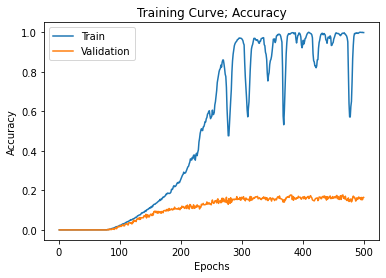

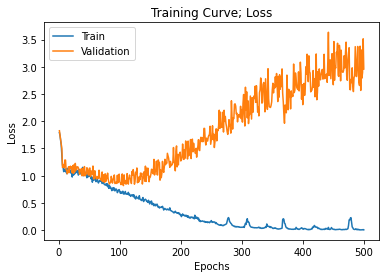

Final Training Accuracy: 0.9976413509655334
Final Validation Accuracy: 0.16438266838542645
Final Training Loss: 0.005019336938858032
Final Validation Loss: 2.958733558654785
Final Epochs: 500
Final Iterations: 12500


In [ ]:
train_primary(model_pri, training_loader, validation_loader, 64, num_epochs=500, lr = 0.001, plot=True, save=True)

In [43]:
best_model = MusicSheetCRNN().cuda()
model_path = '/content/bestmodel_MusicSheetCRNN_bs64_lr0.001'
state = torch.load(model_path)
best_model.load_state_dict(state)

<All keys matched successfully>

In [45]:
def convert_int_to_notes(ints):
  return [noteDict.get(int(i)) for i in ints]

raw prediction: [72, 91, 72, 91, 72, 72, 74, 91, 74, 74, 74, 91, 76, 76, 79, 79, 76, 76, 72, 79, 79, 79, 76, 76, 74, 72, 72, 71, 71, 71, 71, 71, 91, 91, 0, 0, 91, 91, 0, 0, 0, 91, 0, 0, 0, 91, 0, 0, 0, 91, 91, 0, 91, 91, 0, 0, 91, 91, 0, 0, 0, 91, 91, 0, 0, 0, 91, 91, 91, 0, 0, 91, 91, 0, 0, 91, 91, 0, 0, 0, 91, 91, 0, 0, 91, 91, 0, 0, 91, 91, 0, 0, 91, 91, 0, 0, 91, 91, 91, 0, 0, 91, 91, 0, 0, 0, 0, 91, 91, 0, 0, 0, 91, 91, 91, 0, 0, 0, 91, 0, 91, 0, 91, 0, 91, 0, 91, 0, 91, 0, 91, 0, 91, 0, 91, 0, 91, 0, 91, 0, 91, 0, 91, 0, 91, 0]
prediction: tensor([72., 72., 72., 74., 74., 76., 79., 76., 72., 79., 76., 74., 72., 71.],
       device='cuda:0')
encoded label: tensor([72., 72., 72., 74., 74., 76., 79., 76., 72., 79., 76., 74., 72., 71.],
       device='cuda:0')
correct
1.0
label: ['C5', 'C5', 'C5', 'D5', 'D5', 'E5', 'G5', 'E5', 'C5', 'G5', 'E5', 'D5', 'C5', 'B4']
model prediction: ['C5', 'C5', 'C5', 'D5', 'D5', 'E5', 'G5', 'E5', 'C5', 'G5', 'E5', 'D5', 'C5', 'B4']


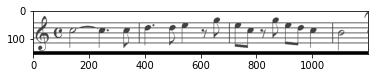

In [58]:
model = best_model
criterion = nn.CTCLoss(blank_label, zero_infinity=True)
for imgs, labels in training_loader:
  #labels = inject_note_breaks(labels)
  out_lengths = torch.IntTensor(batch_size).fill_(model.cnn_output_width)
  labels_lengths = torch.IntTensor([len(t) for t in labels])

  #############################################
  #To Enable GPU Usage
  if use_cuda and torch.cuda.is_available():
    imgs = imgs.cuda()
    labels = labels.cuda()
    out_lengths = out_lengths.cuda()
    labels_lengths = labels_lengths.cuda()
  #############################################
  plt.imshow(imgs[0].cpu().permute(1, 2, 0))
  out = model(imgs)
  out = out.permute(1, 0, 2)
  out = F.log_softmax(out, dim=-1)
  #print(labels_lengths.shape)
  #print(criterion(out, labels, out_lengths, labels_lengths))
  #print(out)
  #print(labels)
  _, max_index = torch.max(out, dim=2)
  #print(max_index)
  total_correct_notes = 0
  for i in range(1):
    raw_prediction = list(max_index[:, i].detach().cpu().numpy())
    print("raw prediction:", raw_prediction)
    prediction = torch.FloatTensor([c for c, _ in groupby(raw_prediction) if c != blank_label and c != 0])
    if use_cuda and torch.cuda.is_available():
      prediction = prediction.cuda()
    print("prediction:", prediction)
    curr_label = labels[i]
    correct_label = curr_label[curr_label.nonzero().squeeze()]
    print("encoded label:", correct_label)
    correct_notes = 0
    if len(prediction) < len(correct_label):
      num_notes = len(prediction)
    else:
      num_notes = len(correct_label)
    for j in range(num_notes):
      if prediction[j] == correct_label[j]:
        correct_notes += 1
    total_correct_notes += len(correct_label)
    if len(prediction) == len(correct_label) and torch.all(prediction.eq(correct_label)):
      print("correct")
    else:
      print(len(prediction))
      print(len(correct_label))
  print(correct_notes / total_correct_notes)
  print("label:", convert_int_to_notes(correct_label))
  print("model prediction:", convert_int_to_notes(prediction))
  break

model prediction: ['G4', 'E5', 'C5', 'D5', 'F5', 'E4', 'G4', 'A4', 'E4', 'F4']


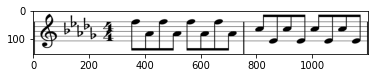

In [70]:
  # obtaining and processing image
  img = plt.imread('/content/someoneyouloved.png')
  img_cropped = img[0:154, 0:1200]
  plt.imshow(img_cropped)

  # feeding image to model
  out = best_model(torch.FloatTensor(img_cropped).permute(2, 1, 0).unsqueeze(0).cuda())
  out = out.permute(1, 0, 2)
  out = F.log_softmax(out, dim=-1)

  # decoding the output 
  _, max_index = torch.max(out, dim=2)
  raw_prediction = list(max_index[:, 0].detach().cpu().numpy())
  prediction = torch.FloatTensor([c for c, _ in groupby(raw_prediction) if c != blank_label and c != 0])
  if use_cuda and torch.cuda.is_available():
    prediction = prediction.cuda()
  
  # results
  print("model prediction:", convert_int_to_notes(prediction))
    

In [ ]:
for imgs, labels in training_loader:
  print(imgs.shape)
  break

torch.Size([64, 3, 154, 1200])


In [ ]:
def train_primary_multidataloader(model, training_loader_list, validation_loader_list, batch_size=32, num_epochs=1, lr=0.001, plot=False, save=False):
    #To use batch sizes we need to set them and prepare a DataLoader for each of the sets

    criterion = nn.CTCLoss(blank_label, zero_infinity=True)
    optimizer = optim.Adam(model.parameters(), lr=lr) 
    train_acc, val_acc, train_loss, val_loss  = [], [], [], []
    iterations = 0
    # training
    plot_epochs = 0

    for epoch in range(num_epochs):
        train_correct = 0
        train_total = 0
        val_correct = 0
        val_total = 0
        for i in range(len(training_loader_list)):
          training_loader = training_loader_list[i]
          for imgs, labels in iter(training_loader):
            out_lengths = torch.IntTensor(batch_size).fill_(model.cnn_output_width)
            labels_lengths = torch.IntTensor([len(t) for t in labels])

            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
              out_lengths = out_lengths.cuda()
              labels_lengths = labels_lengths.cuda()
            #############################################
            
            optimizer.zero_grad()         # a clean up step for PyTorch  
            out = model(imgs)             # forward pass
            out = out.permute(1, 0, 2)
            out = F.log_softmax(out, dim=-1)
            tr_loss = criterion(out, labels, out_lengths, labels_lengths)
            tr_loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            iterations =iterations+1
            
            train_correct, train_total = get_batch_accuracy(out, labels, train_correct, train_total, batch_size)
            del imgs, labels
            torch.cuda.empty_cache()
        
        for i in range(len(validation_loader_list)):
          validation_loader = validation_loader_list[i]    
          for imgs, labels in iter(validation_loader):
            out_lengths = torch.IntTensor(batch_size).fill_(model.cnn_output_width)
            labels_lengths = torch.IntTensor([len(t) for t in labels])
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
              out_lengths = out_lengths.cuda()
              labels_lengths = labels_lengths.cuda()
            #############################################

            out = model(imgs)             # forward pass
            out = out.permute(1, 0, 2)
            out = F.log_softmax(out, dim=-1)
            vl_loss = criterion(out, labels, out_lengths, labels_lengths)

            val_correct, val_total = get_batch_accuracy(out, labels, val_correct, val_total, batch_size)
            del imgs, labels
            torch.cuda.empty_cache()

        plot_epochs = plot_epochs +1
        # save the current training information
        val_loss.append(float(vl_loss))
        train_loss.append(float(tr_loss))
        train_acc.append(train_correct / train_total) # compute training accuracy
        val_acc.append(val_correct / val_total)  # compute validation accuracy
        print("Epoch ", epoch+1, "TrAcc: ",train_acc[epoch],"ValAcc: ",val_acc[epoch],"TrLoss: ",train_loss[epoch], "ValLoss: ",val_loss[epoch], "\n")

        if save and (epoch + 1) % 20 == 0:
          # Save the current model (checkpoint) to a file
          model_path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(model.name, batch_size, lr, epoch + 1)
          torch.save(model.state_dict(), model_path)

    # plotting
    
    plot_epochs_l = np.arange(1, plot_epochs + 1)
    if (plot):

      print("Epochs: {0}, Iterations: {1}, Batch Size: {2}, Learning Rate: {3}".format(plot_epochs, iterations, batch_size, lr))
      plt.title("Training Curve; Accuracy")
      plt.plot(plot_epochs_l, train_acc, label="Train")
      plt.plot(plot_epochs_l, val_acc, label="Validation")
      plt.xlabel("Epochs")
      plt.ylabel("Accuracy")
      plt.legend(loc='best')
      plt.show()  
      plt.title("Training Curve; Loss")
      plt.plot(plot_epochs_l, train_loss, label="Train")
      plt.plot(plot_epochs_l, val_loss, label="Validation")
      plt.xlabel("Epochs")
      plt.ylabel("Loss")
      plt.legend(loc='best')
      plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print("Final Training Loss: {}".format(train_loss[-1]))
    print("Final Validation Loss: {}".format(val_loss[-1]))

    print("Final Epochs: {}".format(plot_epochs))
    print("Final Iterations: {}".format(iterations))

    return

##Transfer Learning Model

In [ ]:
# download vgg model & strip the last FC layer away & freeze parameters
resnet34 = torchvision.models.resnet34(pretrained=True)
resnet34 = torch.nn.Sequential(*(list(resnet34.children())[:-2]))
for param in resnet34.parameters():
    param.requires_grad = False
print(resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth



Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Co

## Computing, Saving, and Loading Features

In [ ]:
for img, label in training_loader:
  print(img.shape)
  print(label.shape)
  break

torch.Size([64, 3, 154, 1200])
torch.Size([64, 47])


In [ ]:
import os
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...

file_dir = "/content/Aps360Project/Resnet_Features"
def compute_resnet_features(model_features, data_loader, name):
  i = 0
  comp_features = torch.tensor(())
  for imgs, labels in iter(data_loader):
    features = model_features(imgs)
    dir = file_dir + '/' + name + '/' + str(labels.numpy())
    if not os.path.isdir(dir):
      os.mkdir(dir)
    torch.save(features.squeeze(0), dir + '/' + str(i) + '.tensor')
    i += 1

In [ ]:
def compute_resnet_features(model_features, data_loader, name):
  i = 0
  comp_features = torch.tensor(())
  tensors = []
  labels = []
  for img, label in iter(data_loader):
    features = model_features(img)
    tensors.append(features)
    labels.append(label)
  dataset = TensorDataset(torch.FloatTensor(tensors), torch.FloatTensor(labels)) # training dataset
  loader = DataLoader(dataset,batch_size=1, shuffle=True) # create your dataloader
  return loader
   # dir = file_dir + '/' + name + '/' + str(labels.numpy())
    # if not os.path.isdir(dir):
    #   os.mkdir(dir)
    # torch.save(features.squeeze(0), dir + '/' + str(i) + '.tensor')
    # i += 1


In [ ]:
# load from dataset
def load_feature_data(batch_size=32):
  train_tensors = torchvision.datasets.DatasetFolder(file_dir + "/training", loader=torch.load, extensions=('.tensor'))
  train_floader = torch.utils.data.DataLoader(train_tensors, batch_size=batch_size, shuffle=True, drop_last=False)
  val_tensors = torchvision.datasets.DatasetFolder(file_dir + "/validation", loader=torch.load, extensions=('.tensor'))
  val_floader = torch.utils.data.DataLoader(val_tensors, batch_size=batch_size, shuffle=True, drop_last=False)
  test_tensors = torchvision.datasets.DatasetFolder(file_dir + "/testing", loader=torch.load, extensions=('.tensor'))
  test_floader = torch.utils.data.DataLoader(test_tensors, batch_size=batch_size, shuffle=True, drop_last=False)
  return train_floader, val_floader, test_floader

In [ ]:
batch_size = 64
train_floader, val_floader, test_floader = load_feature_data(batch_size)

FileNotFoundError: ignored

## RNN model

In [ ]:
class MusicSheetTLRNN(nn.Module):
  def __init__(self, feature_model, out_cn=5, kn_size=3, hid_units=60, rnn_hid_units=128, number_of_classes=91, batch_size=32):
    super(MusicSheetTLRNN, self).__init__()

    self.name = "MusicSheetTLRNN"
    self.batch_size = batch_size
    self.cnn_output_height = 37
    self.feature = feature_model

    # TODO
    self.rnn_input_size = 512

    # RNN layer
    self.rnn_hid_units = rnn_hid_units
    self.lstm = nn.LSTM(self.rnn_input_size, self.rnn_hid_units, batch_first=True)

    # prediction: fully connected layers
    self.fc1 = nn.Linear(self.rnn_hid_units, number_of_classes)
    #self.fc2 = nn.Linear(hid_units, number_of_classes)

  def forward(self, x):
    # print(x.shape)
    x = self.feature(x)

    # print(x.shape)
    x = x.permute(0, 3, 2, 1)
    x = x.reshape(self.batch_size, -1, self.rnn_input_size)
    # print(x.shape)

    # RNN
    # Set an initial hidden state
    h0 = torch.zeros(1, x.size(0), self.rnn_hid_units)
    c0 = torch.zeros(1, x.size(0), self.rnn_hid_units)
    # Forward propagate the LSTM
    out, _ = self.lstm(x, (h0, c0))
    # Extract last layer of RNN (hyperparam)
    
    # prediction
    out = torch.stack([self.fc1(out[i]) for i in range(out.shape[0])])
    return out

## Training

In [ ]:
def TL_train(batch_size=1, num_epochs=1, lr=0.001, plot=False, save=False):
   model = MusicSheetTLRNN(feature_model=resnet34, batch_size=batch_size)
   train_primary(model, psmall_loader, psmall_loader, batch_size=batch_size, num_epochs=num_epochs, lr=lr, plot=plot, save=save)

In [ ]:
use_cuda = False
cnn_output_width = 190

In [ ]:
TL_train(num_epochs=100, plot=True)